In [1]:
import pydicom as dicom
import cv2
import json
import matplotlib.pyplot as plt

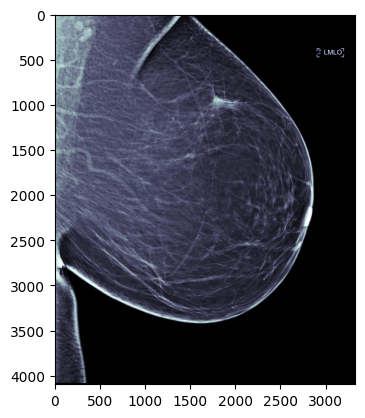

In [2]:
ds2=dicom.dcmread('./Raw Data/benign/N1/P110-L-MLO.dcm')
plt.imshow(ds2.pixel_array, cmap=plt.cm.bone) 

In [4]:
from data.loader import DicomLoader
dicom_loader = DicomLoader('Raw Data','./Raw Data/label_trim.csv')

In [5]:
dicom_loader.__getitem__(0)

{'dcm': {'L': {'MLO': tensor([[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]),
   'CC': tensor([[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]])},
  'R': {'MLO': tensor([[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]),
   'CC': tensor([[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],

In [6]:
from data.loader import DicomLoader,LabelLoader
label_loader = LabelLoader('./Raw Data/label_trim.csv')

In [7]:
label_loader.__getitem__(0)

order                           1
FinalSubjectId                 N1
subjectId                    P110
daysSincePreviousExam         722
examDate                 20210709
examIndex                     NaN
cancerL                         0
cancerR                         0
densityL                        1
densityR                        1
benignMass                      L
malignantMass                   0
benignCalc                      R
malignantCalc                   0
benignAD                        0
malignantAD                     0
benignARD                       0
malignantARD                    0
invL                          0.0
invR                          0.0
age                            52
implantEver                   NaN
implantNow                    NaN
bcHistory                     NaN
yearsSincePreviousBc          NaN
previousBcLaterality          NaN
reduxHistory                  NaN
reduxLaterality               NaN
hrt                           NaN
antiestrogen  

In [8]:
from data.dataset import ClassificationDataset
from torch.utils.data import DataLoader


classificationDataset = ClassificationDataset(dicom_loader,label_loader)
dataloader = DataLoader(classificationDataset, batch_size=4, shuffle=True,drop_last=True)

In [9]:
from model.simple_classification import DicomClassifier
model = DicomClassifier()

In [10]:
for x,y in dataloader:
  pred = model(x)
print(pred)

torch.Size([3328, 2, 2560]) torch.Size([3328, 2, 2560]) N42 P094 0 0
torch.Size([3328, 2, 2560]) torch.Size([3328, 2, 2560]) N5 P143 0 0
torch.Size([4096, 2, 3328]) torch.Size([4096, 2, 3328]) C3 P607 1 0
torch.Size([3328, 2, 2560]) torch.Size([3328, 2, 2560]) N36 P126 0 0


RuntimeError: stack expects each tensor to be equal size, but got [3328, 2, 2560] at entry 0 and [4096, 2, 3328] at entry 2